BASEBALL-CASE STUDY

In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [236]:
baseball=pd.read_csv('Baseball.csv',sep='\t')
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [237]:
df=pd.DataFrame(baseball)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [238]:
df.shape

(30, 17)

In [239]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


W         AxesSubplot(0.125,0.657941;0.110714x0.222059)
R      AxesSubplot(0.257857,0.657941;0.110714x0.222059)
AB     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
H      AxesSubplot(0.523571,0.657941;0.110714x0.222059)
2B     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
3B     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
HR        AxesSubplot(0.125,0.391471;0.110714x0.222059)
BB     AxesSubplot(0.257857,0.391471;0.110714x0.222059)
SO     AxesSubplot(0.390714,0.391471;0.110714x0.222059)
SB     AxesSubplot(0.523571,0.391471;0.110714x0.222059)
RA     AxesSubplot(0.656429,0.391471;0.110714x0.222059)
ER     AxesSubplot(0.789286,0.391471;0.110714x0.222059)
ERA          AxesSubplot(0.125,0.125;0.110714x0.222059)
CG        AxesSubplot(0.257857,0.125;0.110714x0.222059)
SHO       AxesSubplot(0.390714,0.125;0.110714x0.222059)
SV        AxesSubplot(0.523571,0.125;0.110714x0.222059)
E         AxesSubplot(0.656429,0.125;0.110714x0.222059)
dtype: object

<Figure size 360x432 with 0 Axes>

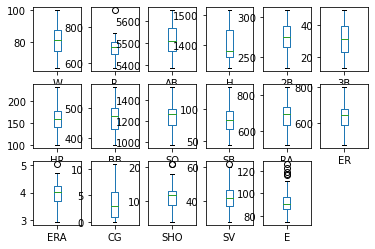

In [240]:
#checking for outliers
plt.figure(figsize=(5,6))
df.plot(kind='box',subplots=True,layout=(3,6))

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [242]:
#checking for missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

observations:
(1)No missing values detected
(2)Presence of outliers suspected in columns: R,E,SHO

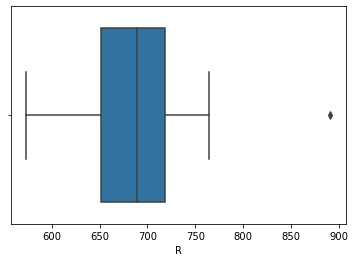

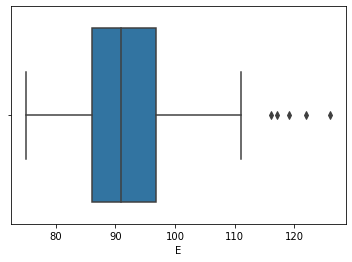

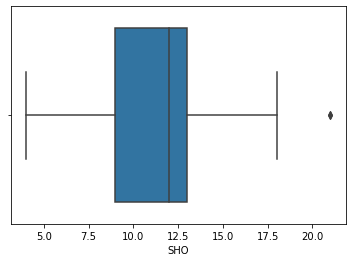

In [243]:
list=['R','E','SHO']
for i in list:
    
    sns.boxplot(df[i])
    plt.show()

presence of outliers detected in R,SHO,E

In [244]:
from scipy.stats import zscore
z=np.abs(zscore(df))


In [245]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [246]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(29, 17)

In [247]:
#checking for skewness
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

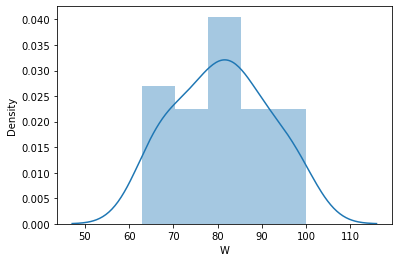

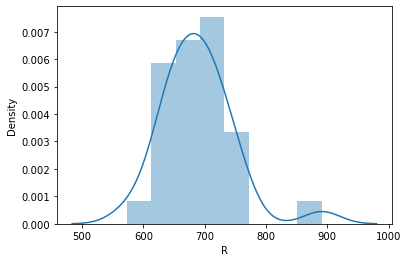

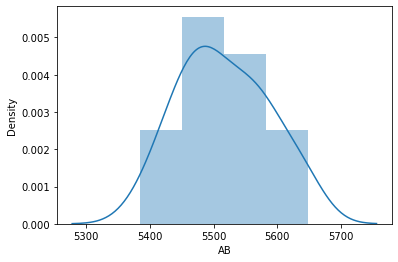

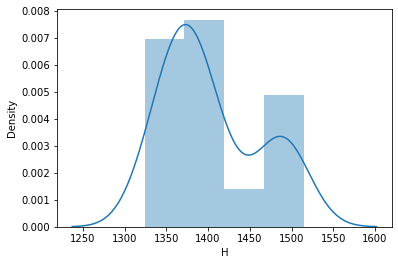

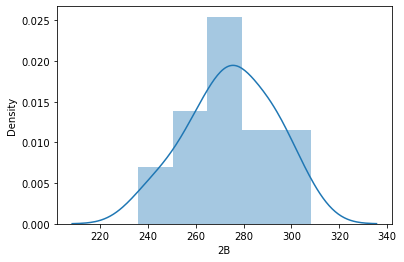

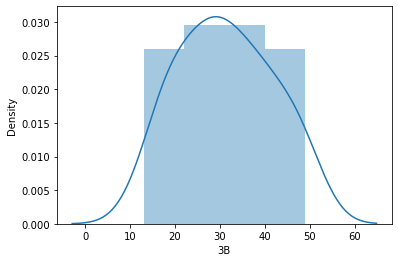

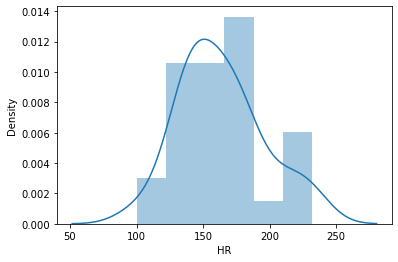

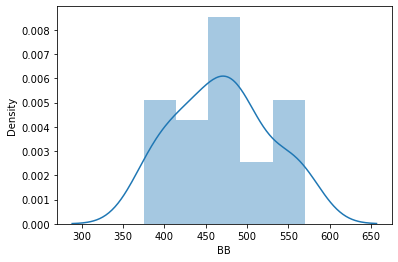

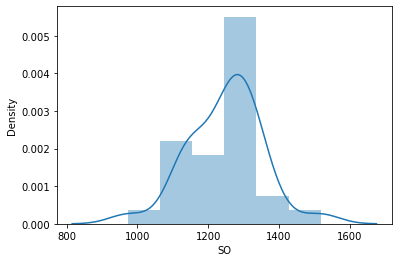

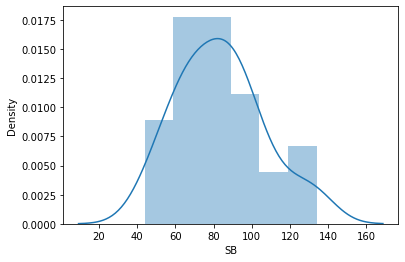

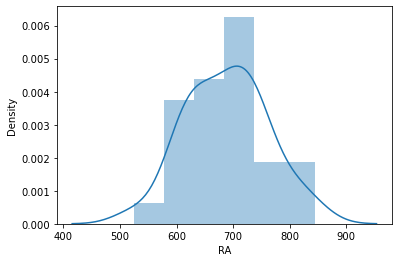

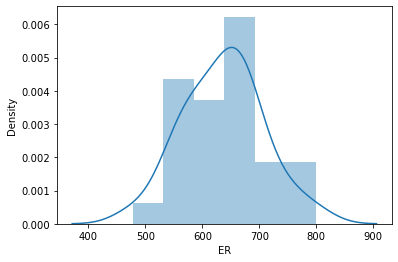

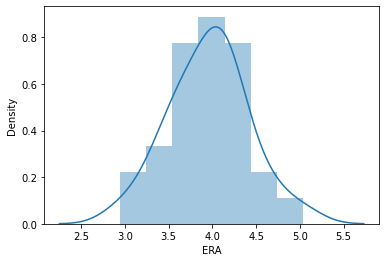

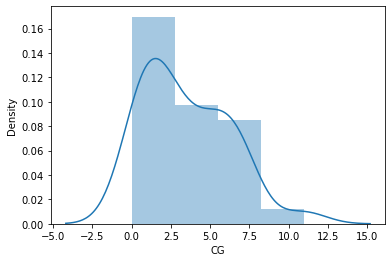

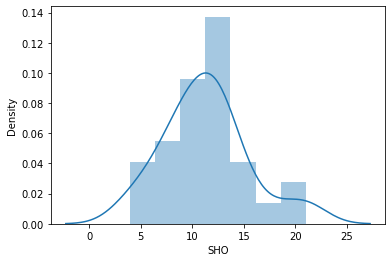

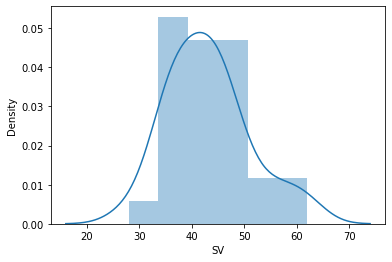

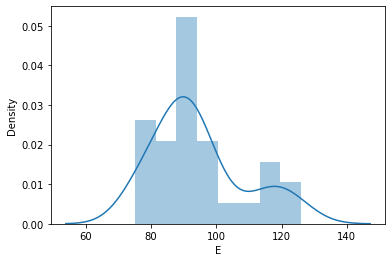

In [248]:
for i in df.columns:
    
    plt.figure()
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

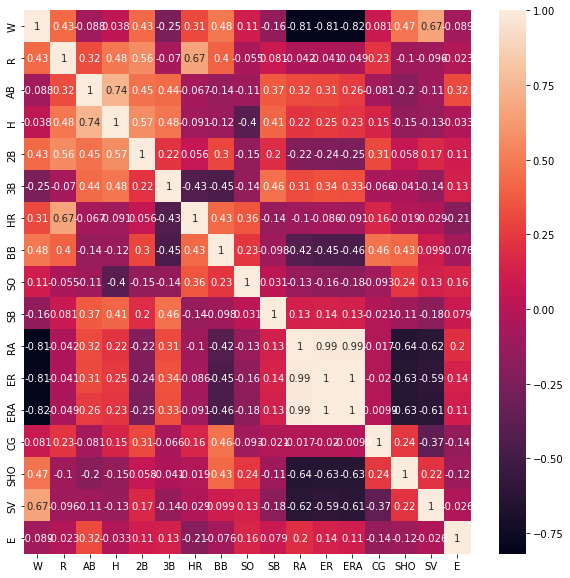

In [249]:
#checking the correlation of the skewed columns with the target(W)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

observation:
(1)since the columns R,CG,E are not highly co-related to the dependent variable(W),operations to remove skewness can be performed on them.
(2)columns ERA,ER,RA show strong linear relationship with the dependent variables as well as amongst themselves.(signs of multi-collinearity)


In [250]:
#removing skewness
from scipy.stats import boxcox
list=['R','E']
for i in list:
    
    df[i]=np.log(df[i])
    print(df[i].skew())

0.7441956366104983
0.6300804690891397


In [251]:
df.skew()

W      0.047089
R      0.744196
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.630080
dtype: float64

<AxesSubplot:>

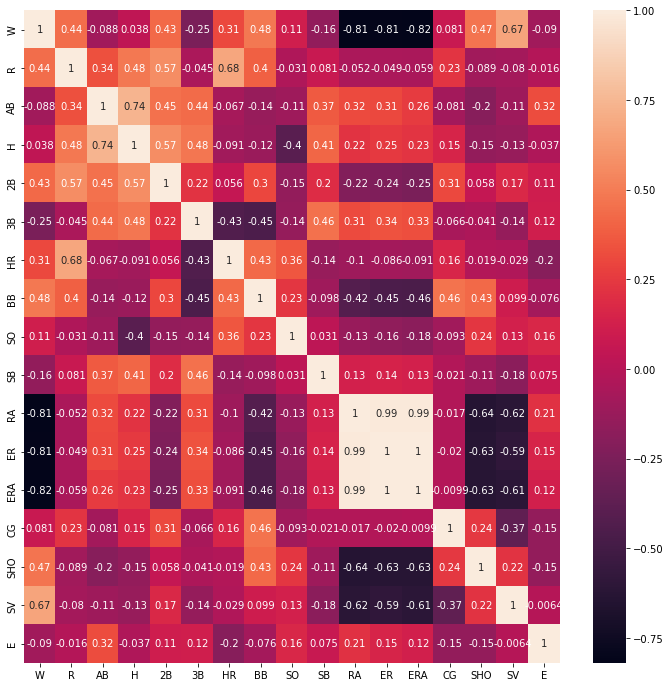

In [252]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

NOW CHECKING FOR MULTICOLLINEARITY

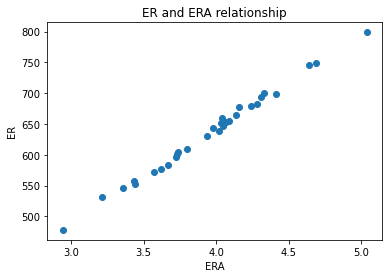

In [253]:
x=df['ERA']
y=df['ER']
plt.title('ER and ERA relationship')
plt.xlabel('ERA')
plt.ylabel('ER')
plt.scatter(x,y)
plt.show()

ER and ERA are multicollinear

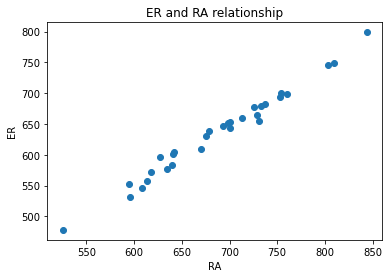

In [254]:
x=df['RA']
y=df['ER']
plt.title('ER and RA relationship')
plt.xlabel('RA')
plt.ylabel('ER')
plt.scatter(x,y)
plt.show()

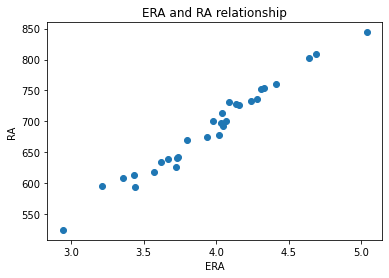

In [255]:
x=df['ERA']
y=df['RA']
plt.title('ERA and RA relationship')
plt.xlabel('ERA')
plt.ylabel('RA')
plt.scatter(x,y)
plt.show()

ERA,RA and ER show multicollinearity amongst themselves and negative correlation with the target variable(W).
Further investigation:


In [256]:
x=df.drop('W',axis=1)
y=df['W']


In [257]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [258]:
def vif_(x):
    
    vif=pd.DataFrame()
    vif['VARIABLES']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [259]:
vif_(x)

,VARIABLES,VIF FACTOR
0,R,39392.541472
1,AB,35600.315166
2,H,2871.093952
3,2B,815.273519
4,3B,30.144293
5,HR,203.256126
6,BB,251.693315
7,SO,366.633285
8,SB,28.298203
9,RA,18148.976932


In [260]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()


In [261]:

    
scaling.fit(df)
scaled_data=scaling.transform(df)
    

In [262]:
scaled_data

array([[0.86486486, 0.52984723, 0.71969697, 0.90575916, 0.88888889,
        0.80555556, 0.29545455, 0.04102564, 0.        , 0.66666667,
        0.36363636, 0.38317757, 0.37619048, 0.18181818, 0.23529412,
        0.82352941, 0.30811606],
       [0.54054054, 0.44050313, 0.31060606, 0.13089005, 0.56944444,
        0.86111111, 0.42424242, 0.32820513, 0.53394495, 0.28888889,
        0.54858934, 0.54517134, 0.53809524, 0.18181818, 0.47058824,
        0.5       , 0.26380266],
       [0.48648649, 0.35087844, 0.20454545, 0.37172775, 0.93055556,
        0.44444444, 0.31060606, 0.81025641, 0.33761468, 0.46666667,
        0.36050157, 0.33021807, 0.34761905, 1.        , 0.35294118,
        0.29411765, 0.1001549 ],
       [0.35135135, 0.18587101, 0.56060606, 0.29842932, 0.33333333,
        0.38888889, 0.27272727, 0.14871795, 0.4733945 , 0.26666667,
        0.55172414, 0.51401869, 0.4952381 , 0.63636364, 0.29411765,
        0.26470588, 0.57370078],
       [0.2972973 , 0.41760543, 0.83333333, 1.      

In [263]:
from sklearn.decomposition import PCA

#y1=y
pca=PCA(n_components=8)
x1=scaled_data[:,1:]
y1=scaled_data[:,0]
#mpca=pd.DataFrame(data=scaled_data)


In [264]:
pca.fit(x1)
x_pca=pca.transform(x1)
dpca=pd.DataFrame(data=x_pca)
dpca


,0,1,2,3,4,5,6,7
0,0.502065,0.469732,0.591694,-0.161748,-0.527322,-0.229978,0.213672,0.171707
1,0.011588,-0.252355,0.174671,-0.163253,-0.024365,0.051109,-0.260622,0.312536
2,-0.352180,0.372273,-0.283530,-0.561166,0.238127,-0.309027,0.340352,0.318194
3,0.125613,-0.357568,-0.026023,-0.068703,0.206380,-0.304795,0.040024,-0.069987
4,0.872439,0.373744,-0.237901,-0.363333,0.129122,-0.085243,-0.337210,-0.046520
5,-0.238398,0.845548,-0.825012,0.050389,-0.242727,-0.068180,0.199451,0.078363
6,-0.199034,0.103426,-0.525597,0.437887,-0.369977,-0.085917,0.078203,-0.043901
7,-0.298634,-0.555883,-0.254607,0.039517,-0.595697,0.146248,-0.350274,-0.128986
8,-0.223514,-0.094688,0.454982,0.156129,-0.183328,0.095446,-0.021296,0.161953
9,0.559233,0.422773,-0.181677,0.152450,-0.177606,-0.287179,-0.131888,-0.209468


In [265]:
scaled_data.shape

(30, 17)

In [266]:
#performing standard scaling on the scaled data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(df)
sc_scale=sc.transform(df)


spca=pd.DataFrame(data=sc_scale)
spca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.365409,0.665385,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.426629
1,0.197838,0.179624,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.591448
2,0.003243,-0.307662,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.200122
3,-0.483244,-1.204801,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.561190
4,-0.677839,0.055130,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.591448
5,1.170814,3.221588,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.426629
6,0.587028,1.327690,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.030431
7,0.003243,0.476828,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.383961
8,-0.094054,-0.776717,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.122113
9,-0.288649,1.067026,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.271480


In [267]:
x2=sc_scale[:,1:]
y2=sc_scale[:,0]
pca_=PCA(n_components=8)
pca_.fit(x2)
x2_pca=pca_.transform(x2)
s_pca=pd.DataFrame(data=x2_pca)
s_pca

,0,1,2,3,4,5,6,7
0,0.863198,2.158907,-2.920051,0.626502,-2.680951,0.181430,0.641311,0.415009
1,0.130338,-0.837391,-0.355959,0.114386,-0.185681,0.483323,-0.942702,1.091750
2,-1.326494,1.151395,0.681311,2.994306,0.244973,-0.758149,1.185875,1.499945
3,0.780528,-1.409568,-0.076566,0.887134,0.409666,-1.171252,0.070533,-0.146048
4,3.316397,1.709374,0.315267,1.284129,0.851757,0.171580,-1.642768,0.365812
5,-0.934627,3.922050,3.228581,0.383048,-1.168026,-0.179625,0.948858,-0.259299
6,-0.287008,0.733325,2.184562,-1.484401,-1.719885,-0.546459,0.400187,-0.160839
7,-0.607741,-1.938951,1.786876,-1.070628,-1.696725,1.346581,-1.360304,-0.619354
8,-1.311145,-0.722280,-1.554969,-1.177090,-0.446690,0.437049,-0.145955,0.890000
9,2.063117,2.087680,0.218178,-0.139023,-0.970616,-0.918433,-0.774325,-0.765943


In [268]:
vif_(s_pca)


,VARIABLES,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0


TESTING THE PERFORMANCE OF THE LINEAR REGRESSION MODEL WITH THE MIN-MAX SCALED VALUE AND STANDARD SCALED VALUES SIMULTANEOUSLY TO SEE WHICH TYPE OF SCALING IS MORE EFFICIENT

In [269]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(s_pca,y2,test_size=.33,random_state=42)
x_train.shape

(20, 8)

In [270]:
ln=LinearRegression()
ln.fit(x_train,y_train)
print('score: ',ln.score(x_train,y_train))


score:  0.8809628395107696


In [271]:
pred_=ln.predict(x_test)
print("mean_squared error: ",mean_squared_error(y_test,pred_))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_))
print("r2 score: ",r2_score(y_test,pred_))

mean_squared error:  0.28536836195476184
mean_absolute_error:  0.41188907425464
r2 score:  0.7855428697695153


In [272]:
#trying it with the other scaled data 
x_train,x_test,y_train,y_test=train_test_split(dpca,y1,test_size=.33,random_state=42)
x_test.shape

(10, 8)

In [273]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print('score: ',lr.score(x_train,y_train))
pred=lr.predict(x_test)
print("mean_squared error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2 score: ",r2_score(y_test,pred))

score:  0.8690626822115337
mean_squared error:  0.022514987424494107
mean_absolute_error:  0.11837936812978911
r2 score:  0.7807127363109531


observation: The model performed better with the min max scaled value 

L1 AND L2 REGULARIZATION

In [274]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [275]:
x_train,x_test,y_train,y_test=train_test_split(dpca,y1,test_size=.33,random_state=42)
y_train.shape

(20,)

In [276]:
#LASSO
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("score: ",ls.score(x_train,y_train))

score:  0.8690394588157212


In [277]:
print("mean_squared error: ",mean_squared_error(y_test,pred_ls))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_ls))
print("r2 score: ",r2_score(y_test,pred_ls))

mean_squared error:  0.02229185421304187
mean_absolute_error:  0.1179024435435038
r2 score:  0.7828859674327382


In [278]:
#RIDGE
rg=Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
print("score: ",rg.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rg))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rg))
print("r2 score: ",r2_score(y_test,pred_rg))

score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535


In [279]:
#ELASTICNET
el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
pred_el=el.predict(x_test)
print("score: ",el.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_el))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_el))
print("r2 score: ",r2_score(y_test,pred_el))

score:  0.8690540556778571
mean_squared error:  0.022367631774091783
mean_absolute_error:  0.1180613144492074
r2 score:  0.7821479233157964


SUPPORT VECTOR MACHINE

In [280]:
from sklearn.svm import SVR
list=['linear','poly','rbf']
for i in list:
    
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    pred_svr=svr.predict(x_test)
    print("score : ",svr.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
    print("r2 score: ",r2_score(y_test,pred_svr))

score :  0.8430136208313483
mean_squared error:  0.01915665523001203
mean_absolute_error:  0.10580297459919544
r2 score:  0.8134215921322818
score :  0.892649017102103
mean_squared error:  0.048536628056780516
mean_absolute_error:  0.16688199071069226
r2 score:  0.527272027534629
score :  0.8878264095593884
mean_squared error:  0.04807838664401283
mean_absolute_error:  0.18119868561263447
r2 score:  0.5317351215448665


In [281]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
pred_knr=knr.predict(x_test)
print("score : ",knr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 score: ",r2_score(y_test,pred_knr))

score :  0.47345902621295544
mean_squared error:  0.04039737034331628
mean_absolute_error:  0.16432432432432428
r2 score:  0.6065452475811042


In [282]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [283]:
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("score : ",dtr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_dtr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_dtr))
print("r2 score: ",r2_score(y_test,pred_dtr))

score :  1.0
mean_squared error:  0.09342585829072317
mean_absolute_error:  0.2513513513513514
r2 score:  0.09006829823562867


OBSERVATIONS:
(1)the decision tree regressor has the best learning score but exhibits a very low r2 score value
(2)the svr's linear kernel has exhibited the best overall performance with scores:score :  0.8430136208313483
mean_squared error:  0.01915665523001203
mean_absolute_error:  0.10580297459919544
r2 score:  0.8134215921322818

USING GRID SEARCH CV FOR FURTHER TESTING:

In [284]:
from sklearn.model_selection import GridSearchCV

In [296]:
#SVR
svr1=SVR(gamma='auto')
paramgrid={'kernel':['rbf','poly','linear']}
#c_v={'cv':[5,10,20]}
grid=GridSearchCV(svr1,paramgrid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_score_)
#print(grid.best_estimator_.cv)
print(grid.best_params_)

0.4722665762980521
{'kernel': 'linear'}


In [297]:
#RIDGE
rd2=Ridge()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(estimator=rd2,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.5751889873649969
1.0
{'alpha': 1.0}


In [289]:
list=[1.0,0.1,0.01,0.001,0.0001]
for i in list:
    
    rg=Ridge(alpha=0.0001)
    rg.fit(x_train,y_train)
    pred_rg=rg.predict(x_test)
    print("score: ",rg.score(x_train,y_train))
    print("mean_squared error: ",mean_squared_error(y_test,pred_rg))
    print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rg))
    print("r2 score: ",r2_score(y_test,pred_rg))

score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535
score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535
score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535
score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535
score:  0.8690626788708439
mean_squared error:  0.022511387580641543
mean_absolute_error:  0.11837134469932656
r2 score:  0.7807477973968535


In [290]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print("score : ",svr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_svr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svr))
print("r2 score: ",r2_score(y_test,pred_svr))

score :  0.8430136208313483
mean_squared error:  0.01915665523001203
mean_absolute_error:  0.10580297459919544
r2 score:  0.8134215921322818


CONCLUSION:
The SVR kernel linear has the best overall performance amongst all the models used


PROCEEDING TO SAVING THE MODEL

In [292]:
import pickle

In [293]:
filename='final_model.sav'
pickle.dump(svr,open(filename,'wb'))

Loading the model again

In [298]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)

In [299]:
result

0.8430136208313483